# Introduction 
    * Minize churn (subscription cancellations)
    * Identify what behavioural pattern leads to disengagement with the product
* Target - Focus on all subcription base of the company and find the churn irritants, to start the focus on re-engaging with the product. For example, via email reminders about product benefits.

# Case Study
* A Fintech company's app that allows subscribers to manage their bank accounts, provides personalized coupons, informs them and educates them about the market.

* GOAL - Identify users who are likely to cancel their subscription, so that we can identify best ways to re-engage them.

# Data
* We have some info on customer finances & how they handle finances using the app & we have some demographic data through sign-ups.


# Import Libraries

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data, descriptions, Null treatment

In [110]:
data=pd.read_csv('churn_data.csv')

In [111]:
pd.set_option('display.max_columns',None)
data.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,1.0,0.03,0


In [112]:
data.isna().sum()/data.shape[0]*100

user                        0.000000
churn                       0.000000
age                         0.014815
housing                     0.000000
credit_score               29.744444
deposits                    0.000000
withdrawal                  0.000000
purchases_partners          0.000000
purchases                   0.000000
cc_taken                    0.000000
cc_recommended              0.000000
cc_disliked                 0.000000
cc_liked                    0.000000
cc_application_begin        0.000000
app_downloaded              0.000000
web_user                    0.000000
app_web_user                0.000000
ios_user                    0.000000
android_user                0.000000
registered_phones           0.000000
payment_type                0.000000
waiting_4_loan              0.000000
cancelled_loan              0.000000
received_loan               0.000000
rejected_loan               0.000000
zodiac_sign                 0.000000
left_for_two_month_plus     0.000000
l

In [113]:
data.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,0.050630,0.013111,8.197852,0.952481,0.606074,0.561741,0.393926,0.587259,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,0.871366,0.238158,12.497243,0.212749,0.488628,0.496183,0.488628,0.492336,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,0.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,65.000000,27.000000,263.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


* 30% credit_score is null
* 12% reward_earnedare null
* 0 0.01% age is null

In [114]:
# Get rid of 4 rows in age that are null

In [115]:
data=data[pd.notnull(data['age'])]

In [116]:
data['age'].isna().sum()

0

In [117]:
# Remove columns with high nulls
data=data.drop(columns=['credit_score','rewards_earned'])

In [118]:
data.isna().sum()

user                       0
churn                      0
age                        0
housing                    0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
app_web_user               0
ios_user                   0
android_user               0
registered_phones          0
payment_type               0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
zodiac_sign                0
left_for_two_month_plus    0
left_for_one_month         0
reward_rate                0
is_referred                0
dtype: int64

In [119]:
data.shape

(26996, 29)

# Visualizations

# Histograms

In [120]:
data2=data.drop(columns=['user','churn'])

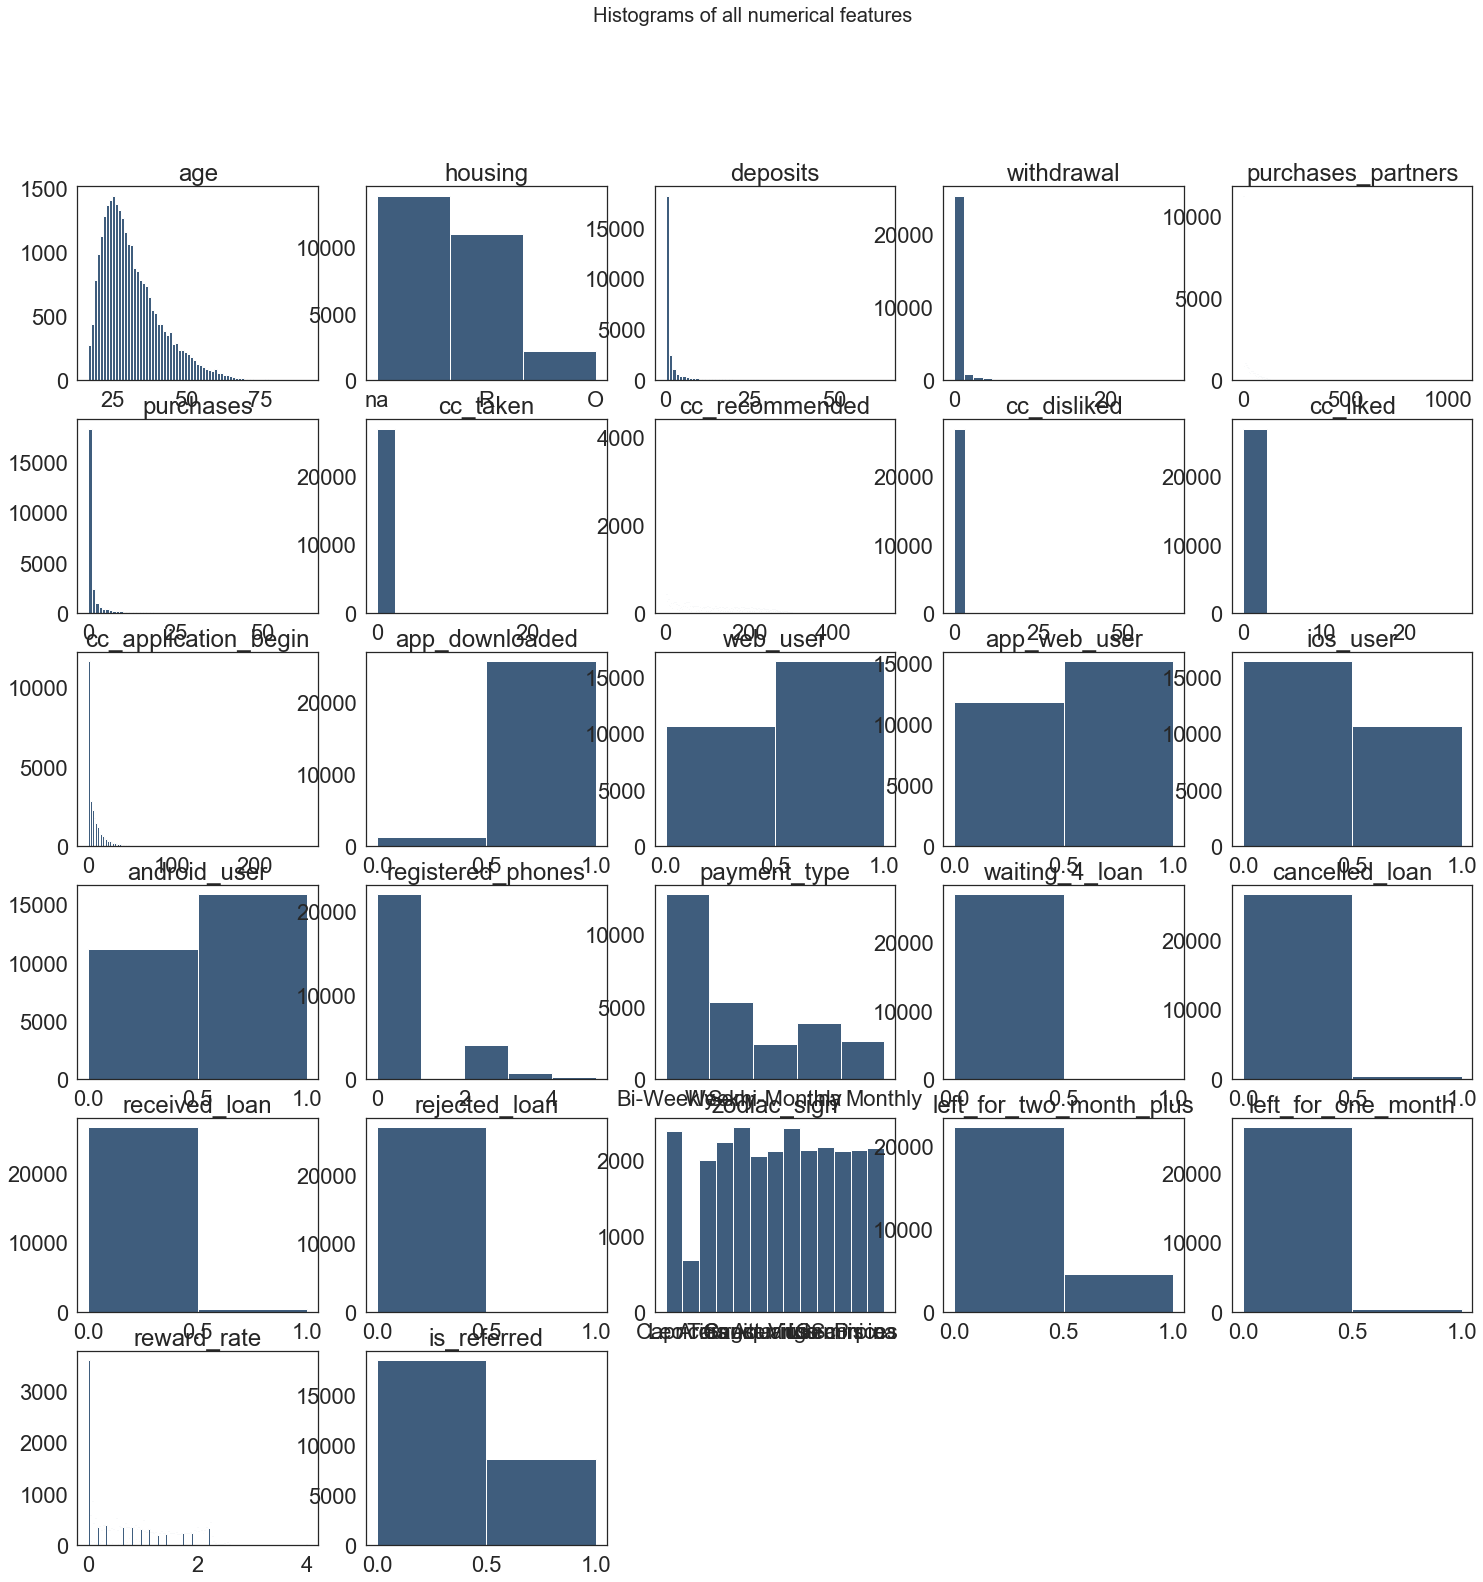

In [121]:
plt.figure(figsize=(25,25))
plt.suptitle('Histograms of all numerical features',fontsize=20)
c=1
for i in data2.columns:
    plt.subplot(6,5,c)
    c+=1
    f=plt.gca()
    f.set_title(i)
    vals=data[i].nunique()
    plt.hist(data2[i],bins=vals,color='#3F5D7D')

# Pie charts

In [122]:
# We want to check binary variable distributions
# To ensure that binary columns are not super skewed

In [123]:
data.nunique()

user                       24737
churn                          2
age                           73
housing                        3
deposits                      66
withdrawal                    23
purchases_partners           294
purchases                     64
cc_taken                      12
cc_recommended               325
cc_disliked                   20
cc_liked                       9
cc_application_begin         128
app_downloaded                 2
web_user                       2
app_web_user                   2
ios_user                       2
android_user                   2
registered_phones              5
payment_type                   5
waiting_4_loan                 2
cancelled_loan                 2
received_loan                  2
rejected_loan                  2
zodiac_sign                   13
left_for_two_month_plus        2
left_for_one_month             2
reward_rate                  193
is_referred                    2
dtype: int64

In [124]:
binary_cols=data[data.columns[data.nunique()<=13]]

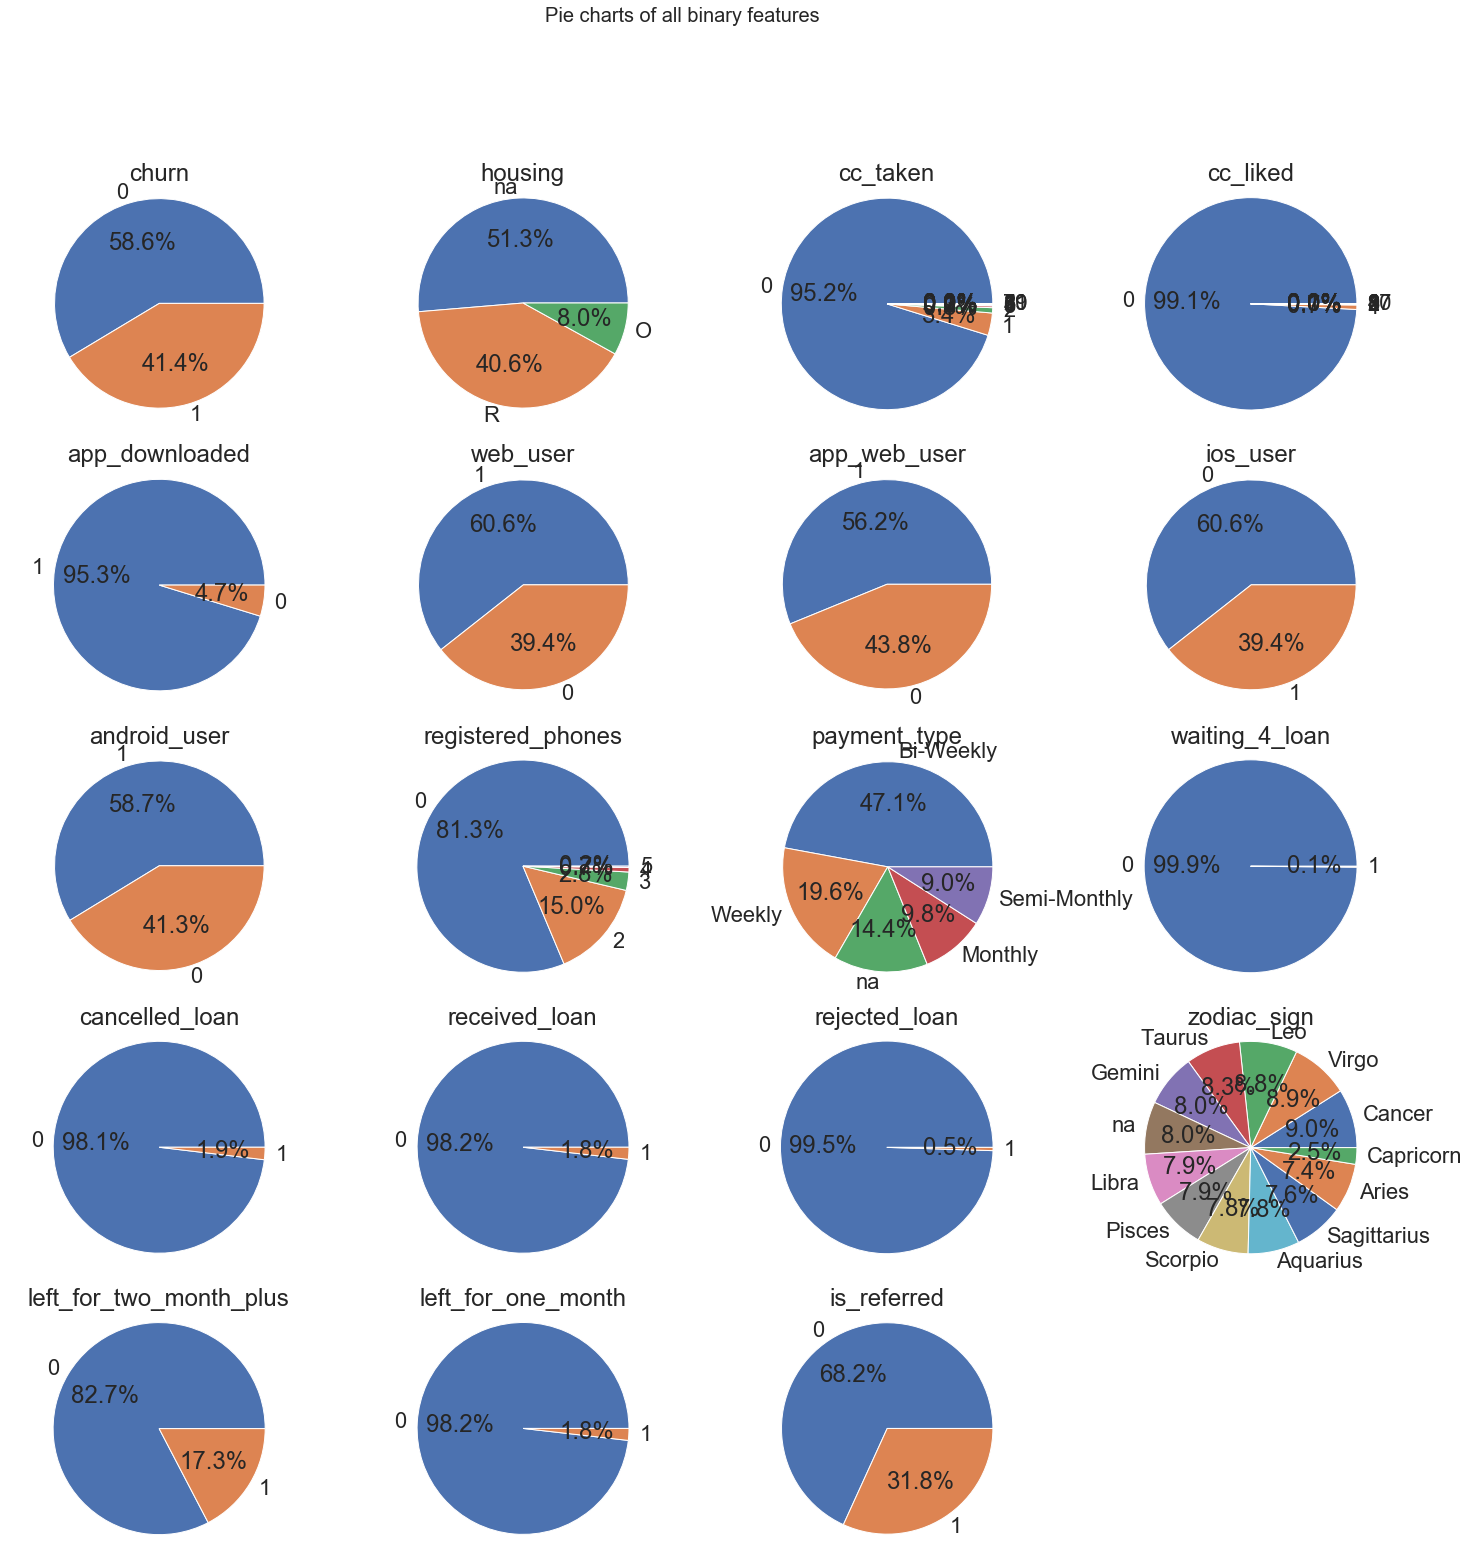

In [125]:
plt.figure(figsize=(25,25))
plt.suptitle('Pie charts of all binary features',fontsize=20)
c=1
for i in binary_cols.columns:
    plt.subplot(5,4,c)
    c+=1
    f=plt.gca()
    f.set_title(i)
    values=binary_cols[i].value_counts(normalize=True).values
    labels=binary_cols[i].value_counts(normalize=True).index
    plt.pie(values,labels=labels,autopct='%1.1f%%')
    plt.axis('equal')

* Skewed variables can affect the training because they may not have enough variation in outcome labels
* So lets check the churn labels for all of them for skewed segments

# Explore Uneven variables

In [126]:
uneven_cols=['cc_liked','cc_taken','rejected_loan','received_loan','cancelled_loan','left_for_one_month','waiting_4_loan']

In [127]:
for cols in uneven_cols:
    print(cols,'\n',data[binary_cols[cols]==1].churn.value_counts())

cc_liked 
 1    104
0     78
Name: churn, dtype: int64
cc_taken 
 1    533
0    390
Name: churn, dtype: int64
rejected_loan 
 1    107
0     25
Name: churn, dtype: int64
received_loan 
 1    292
0    199
Name: churn, dtype: int64
cancelled_loan 
 1    274
0    234
Name: churn, dtype: int64
left_for_one_month 
 1    266
0    222
Name: churn, dtype: int64
waiting_4_loan 
 0    27
1     8
Name: churn, dtype: int64


# Exploring Correlations

* Check correlations of IVs with DV, to get a sense of which can be good predictors


In [128]:
numeric=data.drop(columns=['churn','user','housing','payment_type','zodiac_sign'])

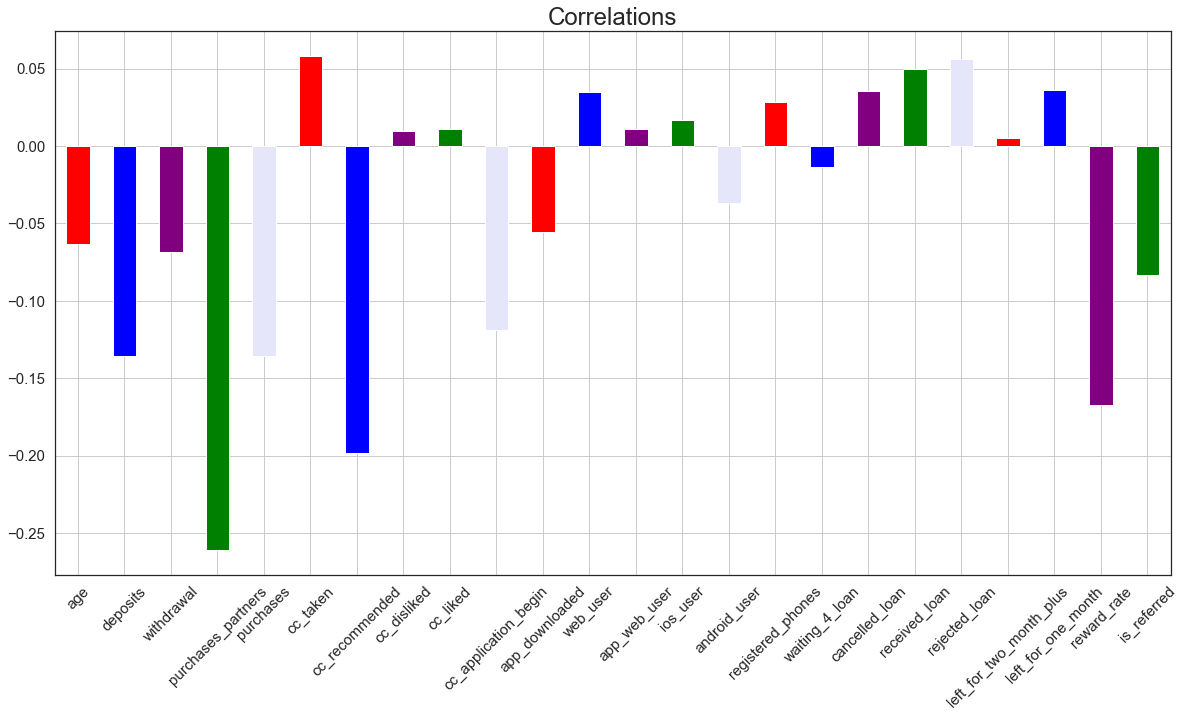

In [129]:
numeric.corrwith(data['churn']).plot.bar(figsize=(20,10),title='Correlations',fontsize=15,color=['red', 'blue', 'purple', 'green', 'lavender'],rot=45,grid=True);

# Some indications from chart above
* Why those who have taken credit are more likely to leave ?
* Less Credit recommendations, more likely to churn?
* Less engagement = More churn
* Web, app, ios, webapp user  are more likely to churn but android ones stay
* If you are referred, less likely to churn

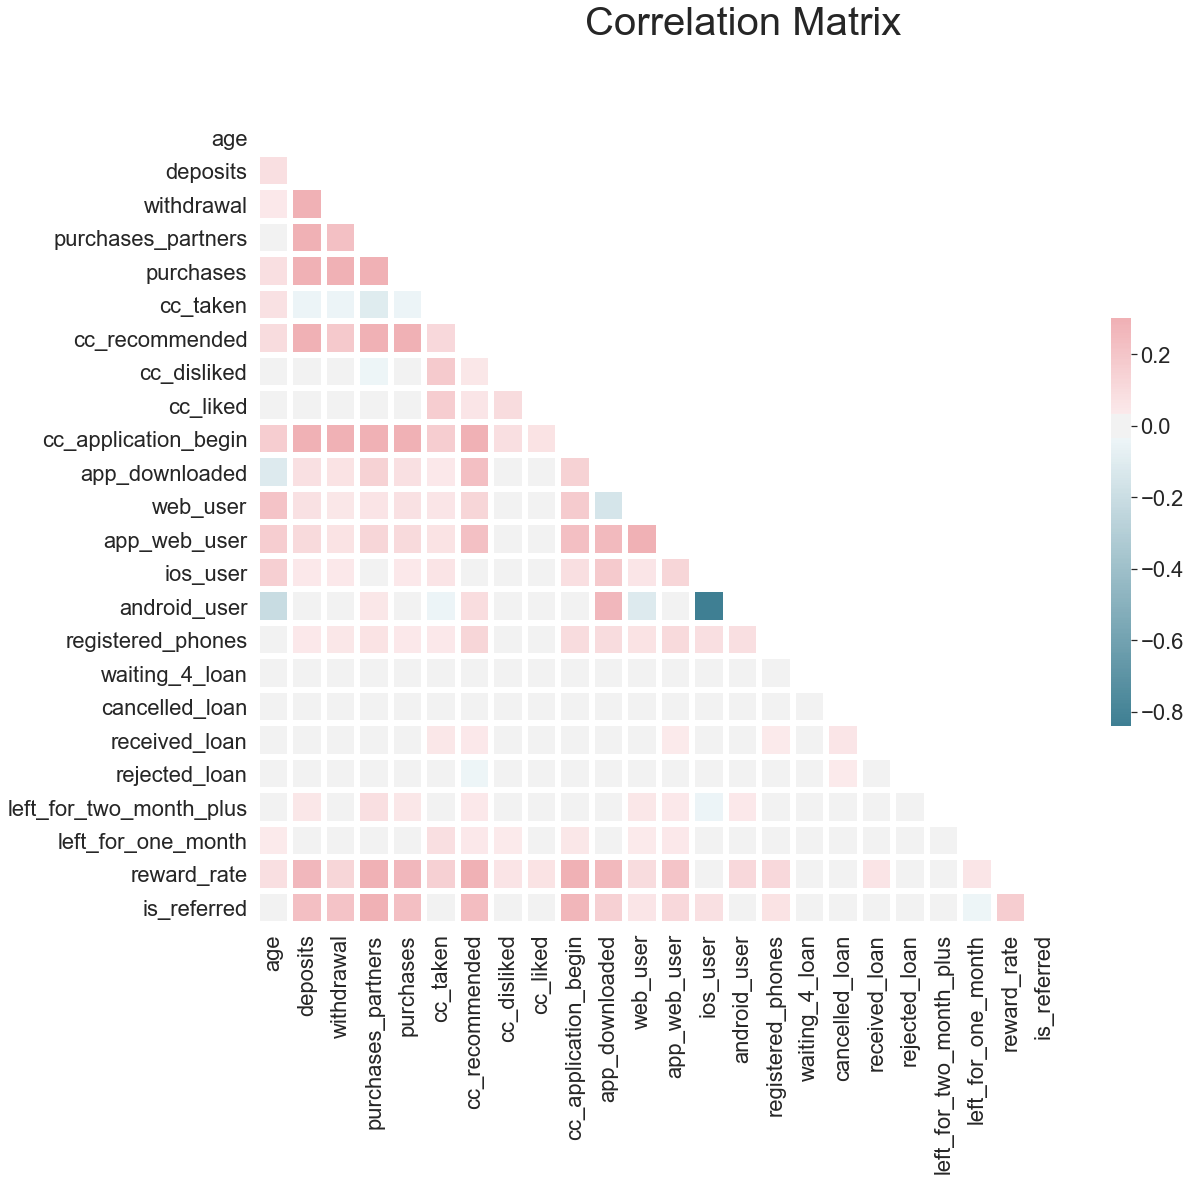

In [130]:
sns.set(style='white',font_scale=2)
corr=data.drop(columns=['user','churn']).corr()
#mask for upper triangle
#because lower end is same as upper end
#thus, no upper triangle
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

#setup matplot fig
f,ax=plt.subplots(figsize=(18,15))
f.suptitle('Correlation Matrix',fontsize=40)

#generate a custom diverging colormap
cmap=sns.diverging_palette(220,10,as_cmap=True)

#
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=5,cbar_kws={'shrink':.5});

* Android and iOS correlation is so strong that its like keeping duplicate information. Redundancy should be removed by removing one variable.
* app_web_user is based on web_user, app_user and thus, it isnt independent variable and can be removed.

In [131]:
data=data.drop(columns=['app_web_user'])

# Data Preparation

In [132]:
user_identifiers=data['user'] # Save user column

In [133]:
data=data.drop(columns=['user'])

# One hot Encoding on Categoricals

In [134]:
data_ohe=pd.get_dummies(data)

* Dummy variable Trap is when you end up with Correlated columns and redundant information due to Dummy columns

In [135]:
# We drop such columns
data_ohe=data_ohe.drop(columns=['housing_na','zodiac_sign_na','payment_type_na'])

# Train test Split

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X_train,X_test,y_train,y_test=train_test_split(data_ohe.drop(columns='churn'),data_ohe['churn'],test_size=0.2)

In [138]:
X_train.shape,X_test.shape

((21596, 41), (5400, 41))

# Feature Scaling and Balancing

* What is Balancing?
* if our model gives all 0's , it will still be almost 60% accurate since 0's and 1 's are not balanced/equal
* Solution <font color='red'> We balance values in Response variable </font>

In [139]:
y_train.value_counts()

0    12658
1     8938
Name: churn, dtype: int64

In [140]:
# Split data
pos_index=y_train[y_train.values==1].index #Row index
neg_index=y_train[y_train.values==0].index

In [141]:
if len(pos_index)>len(neg_index):
    higher=pos_index
    lower=neg_index
else:
    higher=neg_index
    lower=pos_index

In [142]:
np.random.seed(0)

In [143]:
#Randomly select indices of higher of size of length of lower
higher=np.random.choice(higher,size=len(lower))

In [144]:
lower=np.asarray(lower) #Since higher is array

In [145]:
new_indices=np.concatenate((lower,higher))

In [146]:
X_train=X_train.loc[new_indices,:]

In [147]:
y_train=y_train.loc[new_indices]

In [235]:
user_test=user_identifiers[X_test.index]

In [148]:
X_train.shape

(17876, 41)

In [149]:
y_train.value_counts()

0    8938
1    8938
Name: churn, dtype: int64

# Feature Scaling

In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
sc=StandardScaler()

## Scaled and preserve column names and row indices

In [152]:
X_train_scaled=pd.DataFrame(sc.fit_transform(X_train))

In [153]:
X_test_scaled=pd.DataFrame(sc.transform(X_test))

In [154]:
X_train_scaled.columns=X_train.columns

In [155]:
X_test_scaled.columns=X_test.columns

In [156]:
X_train_scaled.index=X_train.index

In [157]:
X_test_scaled.index=X_test.index

In [158]:
X_train_scaled

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred,housing_O,housing_R,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,zodiac_sign_Aquarius,zodiac_sign_Aries,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
8176,-0.515592,-0.361253,-0.276627,-0.608192,-0.361271,-0.172712,-0.999600,-0.056108,-0.077688,-0.667719,0.226865,0.801035,1.243121,0.837075,1.691982,-0.032619,-0.142343,-0.136505,-0.070336,-0.456161,-0.141110,-1.180503,-0.671546,-0.3,1.214443,-0.945434,-0.329216,-0.311486,2.004276,-0.292402,-0.277951,-0.312997,-0.156808,-0.294202,-0.309103,-0.292628,-0.296218,-0.282248,-0.291161,-0.3021,-0.315361
12387,-1.015663,2.205779,1.565083,1.120850,2.261696,-0.172712,0.461585,-0.056108,-0.077688,2.252325,0.226865,0.801035,1.243121,0.837075,2.773312,-0.032619,-0.142343,-0.136505,-0.070336,2.192209,-0.141110,0.111067,1.489101,-0.3,1.214443,1.057716,-0.329216,-0.311486,-0.498933,-0.292402,-0.277951,-0.312997,-0.156808,-0.294202,-0.309103,-0.292628,-0.296218,-0.282248,-0.291161,-0.3021,3.170968
16220,-0.415577,-0.361253,-0.276627,0.892006,-0.361271,-0.172712,0.678479,-0.056108,-0.077688,-0.000280,0.226865,0.801035,-0.804427,0.837075,1.691982,-0.032619,-0.142343,-0.136505,-0.070336,-0.456161,-0.141110,0.643673,-0.671546,-0.3,-0.823423,-0.945434,-0.329216,-0.311486,-0.498933,-0.292402,-0.277951,-0.312997,-0.156808,-0.294202,-0.309103,-0.292628,-0.296218,-0.282248,-0.291161,-0.3021,-0.315361
20865,-0.015520,-0.361253,-0.276627,-0.659046,-0.361271,-0.172712,0.758388,-0.056108,-0.077688,-0.083710,0.226865,0.801035,1.243121,0.837075,1.691982,-0.032619,-0.142343,-0.136505,-0.070336,-0.456161,-0.141110,1.442583,-0.671546,-0.3,1.214443,1.057716,-0.329216,-0.311486,-0.498933,-0.292402,-0.277951,-0.312997,-0.156808,-0.294202,3.235170,-0.292628,-0.296218,-0.282248,-0.291161,-0.3021,-0.315361
26695,-0.015520,-0.026423,-0.276627,-0.608192,-0.019145,-0.172712,-0.965354,-0.056108,-0.077688,-0.500859,0.226865,-1.248385,-0.804427,0.837075,-0.470677,-0.032619,-0.142343,-0.136505,-0.070336,-0.456161,-0.141110,-1.007406,-0.671546,-0.3,1.214443,-0.945434,-0.329216,3.210416,-0.498933,3.419945,-0.277951,-0.312997,-0.156808,-0.294202,-0.309103,-0.292628,-0.296218,-0.282248,-0.291161,-0.3021,-0.315361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10040,-0.815634,-0.361253,-0.276627,-0.659046,-0.361271,-0.172712,-1.022431,-0.056108,-0.077688,-0.667719,0.226865,-1.248385,-0.804427,0.837075,-0.470677,-0.032619,-0.142343,-0.136505,-0.070336,-0.456161,-0.141110,-1.180503,-0.671546,-0.3,-0.823423,-0.945434,-0.329216,-0.311486,-0.498933,-0.292402,-0.277951,3.194922,-0.156808,-0.294202,-0.309103,-0.292628,-0.296218,-0.282248,-0.291161,-0.3021,-0.315361
23870,-0.415577,-0.361253,-0.276627,1.756526,-0.361271,-0.172712,1.854277,-0.056108,-0.077688,0.333439,0.226865,-1.248385,-0.804427,0.837075,-0.470677,-0.032619,-0.142343,-0.136505,-0.070336,-0.456161,7.086652,1.655625,-0.671546,-0.3,1.214443,1.057716,-0.329216,-0.311486,-0.498933,-0.292402,-0.277951,-0.312997,-0.156808,-0.294202,-0.309103,-0.292628,-0.296218,-0.282248,-0.291161,-0.3021,3.170968
3499,-0.615606,-0.361253,-0.276627,-0.659046,-0.361271,-0.172712,-1.022431,-0.056108,-0.077688,-0.667719,-4.407915,0.801035,-0.804427,-1.194636,-0.470677,-0.032619,-0.142343,-0.136505,-0.070336,-0.456161,-0.141110,-1.180503,-0.671546,-0.3,-0.823423,1.057716,-0.329216,-0.311486,-0.498933,-0.292402,3.597755,-0.312997,-0.156808,-0.294202,-0.309103,-0.292628,-0.296218,-0.282248,

In [159]:
X_train=X_train_scaled
X_test=X_test_scaled

In [160]:
X_train

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred,housing_O,housing_R,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,zodiac_sign_Aquarius,zodiac_sign_Aries,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
8176,-0.515592,-0.361253,-0.276627,-0.608192,-0.361271,-0.172712,-0.999600,-0.056108,-0.077688,-0.667719,0.226865,0.801035,1.243121,0.837075,1.691982,-0.032619,-0.142343,-0.136505,-0.070336,-0.456161,-0.141110,-1.180503,-0.671546,-0.3,1.214443,-0.945434,-0.329216,-0.311486,2.004276,-0.292402,-0.277951,-0.312997,-0.156808,-0.294202,-0.309103,-0.292628,-0.296218,-0.282248,-0.291161,-0.3021,-0.315361
12387,-1.015663,2.205779,1.565083,1.120850,2.261696,-0.172712,0.461585,-0.056108,-0.077688,2.252325,0.226865,0.801035,1.243121,0.837075,2.773312,-0.032619,-0.142343,-0.136505,-0.070336,2.192209,-0.141110,0.111067,1.489101,-0.3,1.214443,1.057716,-0.329216,-0.311486,-0.498933,-0.292402,-0.277951,-0.312997,-0.156808,-0.294202,-0.309103,-0.292628,-0.296218,-0.282248,-0.291161,-0.3021,3.170968
16220,-0.415577,-0.361253,-0.276627,0.892006,-0.361271,-0.172712,0.678479,-0.056108,-0.077688,-0.000280,0.226865,0.801035,-0.804427,0.837075,1.691982,-0.032619,-0.142343,-0.136505,-0.070336,-0.456161,-0.141110,0.643673,-0.671546,-0.3,-0.823423,-0.945434,-0.329216,-0.311486,-0.498933,-0.292402,-0.277951,-0.312997,-0.156808,-0.294202,-0.309103,-0.292628,-0.296218,-0.282248,-0.291161,-0.3021,-0.315361
20865,-0.015520,-0.361253,-0.276627,-0.659046,-0.361271,-0.172712,0.758388,-0.056108,-0.077688,-0.083710,0.226865,0.801035,1.243121,0.837075,1.691982,-0.032619,-0.142343,-0.136505,-0.070336,-0.456161,-0.141110,1.442583,-0.671546,-0.3,1.214443,1.057716,-0.329216,-0.311486,-0.498933,-0.292402,-0.277951,-0.312997,-0.156808,-0.294202,3.235170,-0.292628,-0.296218,-0.282248,-0.291161,-0.3021,-0.315361
26695,-0.015520,-0.026423,-0.276627,-0.608192,-0.019145,-0.172712,-0.965354,-0.056108,-0.077688,-0.500859,0.226865,-1.248385,-0.804427,0.837075,-0.470677,-0.032619,-0.142343,-0.136505,-0.070336,-0.456161,-0.141110,-1.007406,-0.671546,-0.3,1.214443,-0.945434,-0.329216,3.210416,-0.498933,3.419945,-0.277951,-0.312997,-0.156808,-0.294202,-0.309103,-0.292628,-0.296218,-0.282248,-0.291161,-0.3021,-0.315361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10040,-0.815634,-0.361253,-0.276627,-0.659046,-0.361271,-0.172712,-1.022431,-0.056108,-0.077688,-0.667719,0.226865,-1.248385,-0.804427,0.837075,-0.470677,-0.032619,-0.142343,-0.136505,-0.070336,-0.456161,-0.141110,-1.180503,-0.671546,-0.3,-0.823423,-0.945434,-0.329216,-0.311486,-0.498933,-0.292402,-0.277951,3.194922,-0.156808,-0.294202,-0.309103,-0.292628,-0.296218,-0.282248,-0.291161,-0.3021,-0.315361
23870,-0.415577,-0.361253,-0.276627,1.756526,-0.361271,-0.172712,1.854277,-0.056108,-0.077688,0.333439,0.226865,-1.248385,-0.804427,0.837075,-0.470677,-0.032619,-0.142343,-0.136505,-0.070336,-0.456161,7.086652,1.655625,-0.671546,-0.3,1.214443,1.057716,-0.329216,-0.311486,-0.498933,-0.292402,-0.277951,-0.312997,-0.156808,-0.294202,-0.309103,-0.292628,-0.296218,-0.282248,-0.291161,-0.3021,3.170968
3499,-0.615606,-0.361253,-0.276627,-0.659046,-0.361271,-0.172712,-1.022431,-0.056108,-0.077688,-0.667719,-4.407915,0.801035,-0.804427,-1.194636,-0.470677,-0.032619,-0.142343,-0.136505,-0.070336,-0.456161,-0.141110,-1.180503,-0.671546,-0.3,-0.823423,1.057716,-0.329216,-0.311486,-0.498933,-0.292402,3.597755,-0.312997,-0.156808,-0.294202,-0.309103,-0.292628,-0.296218,-0.282248,

# Model Building

In [161]:
from sklearn.linear_model import LogisticRegression

In [162]:
lr_clf=LogisticRegression()

In [163]:
lr_clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [164]:
y_pred=lr_clf.predict(X_test)

## Evaluate results

In [165]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score,f1_score

In [166]:
cm=confusion_matrix(y_test,y_pred)

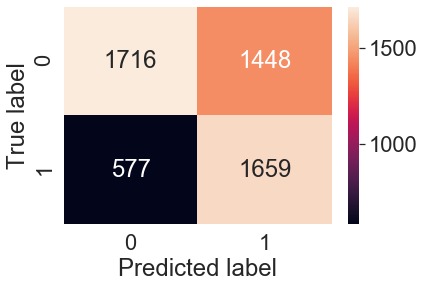

In [167]:
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [168]:
accuracy_score(y_test,y_pred)
#63% accuracy

0.625

In [169]:
precision_score(y_test,y_pred)

# Score of TP/ TP+FP
# Out of all positive predicted, how many were actually positive

0.5339555841647892

In [170]:
recall_score(y_test,y_pred)
# Score of TP/TP+FN
#Out of all actual positives, how many were captured as positive

0.7419499105545617

In [171]:
f1_score(y_test,y_pred)
#Mix of Recall and Precision

0.6209994385176867

* Since our train set labels were balanced, this is acceptable since > 50%

# K Fold Cross Validation

In [172]:
from sklearn.model_selection import cross_val_score

In [173]:
cv=cross_val_score(lr_clf,X_train,y_train,cv=10,scoring='accuracy')

In [174]:
cv

array([0.62863535, 0.64988814, 0.62695749, 0.63478747, 0.64932886,
       0.64821029, 0.64017907, 0.65696698, 0.64017907, 0.6547286 ])

In [175]:
cv.mean() # Consistent over all folds

0.6429861327584632

# Analyze Coefficients of the model

In [176]:
pd.concat([pd.DataFrame(X_train.columns,columns=['features']),
          pd.DataFrame(np.transpose(lr_clf.coef_),columns=['coefficients'])],axis=1).sort_values(by='coefficients',ascending=False,key=abs)

,features,coefficients
3,purchases_partners,-0.675163
4,purchases,-0.408140
1,deposits,0.258997
21,reward_rate,-0.187858
0,age,-0.175289
11,web_user,0.153996
12,ios_user,0.113343
17,received_loan,0.108703
18,rejected_loan,0.100545
23,housing_O,-0.088110


# Feature Selection

* reduce number of columns with same or more accuracy --> better speed

In [177]:
from sklearn.feature_selection import RFE #RecursiveFeatureEngineering
from sklearn.linear_model import LogisticRegression

In [178]:
clf=LogisticRegression()

In [179]:
X_train.shape # we have 41 columns

(17876, 41)

In [180]:
rfe=RFE(estimator=clf,n_features_to_select=20)

In [181]:
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=20, step=1, verbose=0)

In [182]:
X_train.columns[rfe.support_] # Columns selected

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'web_user', 'ios_user',
       'registered_phones', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'reward_rate', 'housing_O',
       'payment_type_Bi-Weekly', 'payment_type_Weekly',
       'zodiac_sign_Capricorn', 'zodiac_sign_Pisces'],
      dtype='object')

In [183]:
rfe.ranking_ # 1s are the ones selected

array([ 1,  1,  1,  1,  1,  1,  1, 18, 14, 17,  8,  1,  1,  9,  1,  2,  1,
        1,  1,  1,  6,  1, 13,  1, 20,  1, 16,  7,  1, 21,  5,  3,  1, 19,
        4, 15,  1, 10, 12, 22, 11])

In [184]:
# Do the same process with new selected columns
lr_clf=LogisticRegression()


In [185]:
X_train=X_train.loc[:,rfe.support_]

In [186]:
lr_clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [187]:
y_pred=lr_clf.predict(X_test.loc[:,rfe.support_])

In [188]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score,f1_score

In [189]:
cm=confusion_matrix(y_test,y_pred)

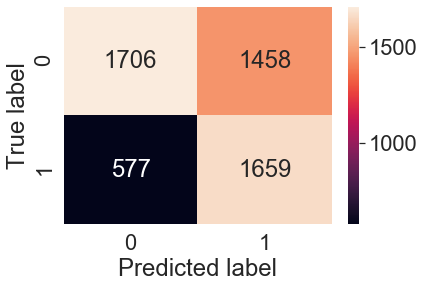

In [190]:
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [191]:
accuracy_score(y_test,y_pred)
#63% accuracy

0.6231481481481481

In [192]:
precision_score(y_test,y_pred)

# Score of TP/ TP+FP
# Out of all positive predicted, how many were actually positive

0.5322425409047161

In [193]:
recall_score(y_test,y_pred)
# Score of TP/TP+FN
#Out of all actual positives, how many were captured as positive

0.7419499105545617

In [194]:
f1_score(y_test,y_pred)
#Mix of Recall and Precision

0.6198393424248086

## Top 20 columns were very important and gave the same result as all columns included

# Model Conclusion

In [195]:
pd.concat([pd.DataFrame(X_train.columns,columns=['features']),
          pd.DataFrame(np.transpose(lr_clf.coef_),columns=['coefficients'])],axis=1).sort_values(by='coefficients',ascending=False,key=abs)

,features,coefficients
3,purchases_partners,-0.673003
4,purchases,-0.407576
1,deposits,0.262275
14,reward_rate,-0.197403
0,age,-0.171059
7,web_user,0.160442
11,received_loan,0.107916
12,rejected_loan,0.100740
8,ios_user,0.092224
6,cc_recommended,0.088714


# Format final results

In [236]:
final_result=pd.concat([y_test,user_test],axis=1)

In [238]:
final_result['predicted_churn']=y_pred

In [239]:
final_result=final_result[['user','churn','predicted_churn']].reset_index(drop=True)

In [240]:
final_result

,user,churn,predicted_churn
0,28759,1,1
1,4137,0,1
2,62117,0,1
3,63680,0,1
4,30060,0,0
...,...,...,...
5395,8218,0,0
5396,48759,0,1
5397,10786,0,1
5398,55670,0,0


# Conclusion

* We are not predicting when the customer is going to churn. thus, we can't validate the model.
* We were focused on finding features that indicated product disengagement.
* Leaving the time frame allows us to focus on who is getting disinterested rather than WHEN they might leave.
* We identified features most related to churn, if we had put a time limit on response variable, then we couldnt have identified long term impact features.
* We can try and gauge problems with disengaged customers and if after that, our model predicts less churn, we can assume better engagement.